In [180]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
%config InlineBackend.figure_format = 'retina'

In [181]:
df = pd.read_csv('/home/arunachal/Programming/scripts/telecom_churn.csv')

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

# Univariate Plots

array([[<AxesSubplot:title={'center':'total_day_calls'}>,
        <AxesSubplot:title={'center':'total_eve_calls'}>],
       [<AxesSubplot:title={'center':'total_night_calls'}>,
        <AxesSubplot:title={'center':'total_intl_calls'}>]], dtype=object)

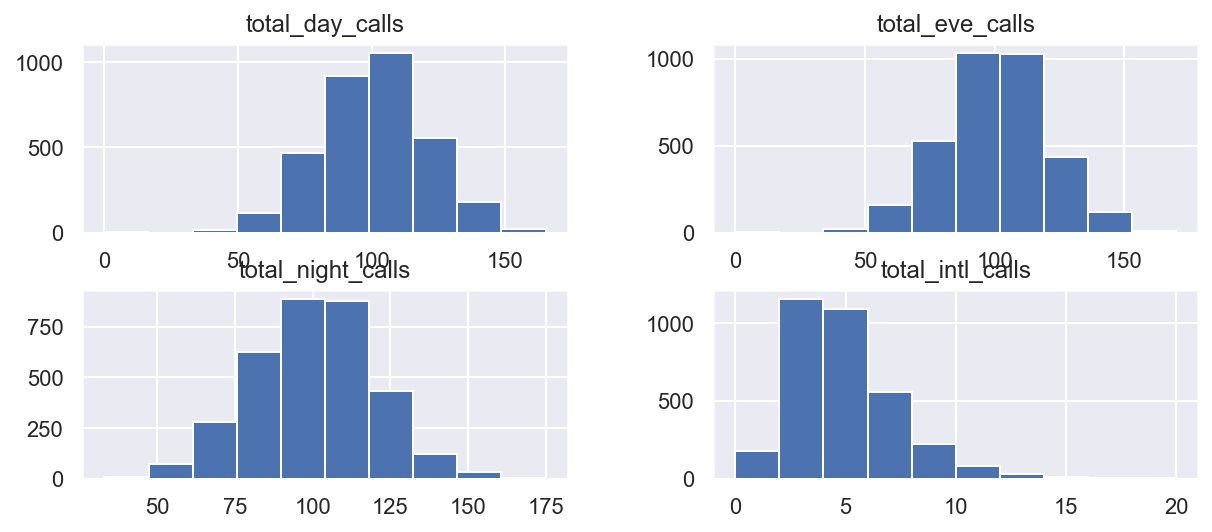

In [183]:
features = ['total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls']
df[features].hist(figsize=(10, 4))

Shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type (most often Gaussian).

array([[<AxesSubplot:title={'center':'total_day_calls'}>,
        <AxesSubplot:title={'center':'total_day_minutes'}>,
        <AxesSubplot:title={'center':'total_day_charge'}>]], dtype=object)

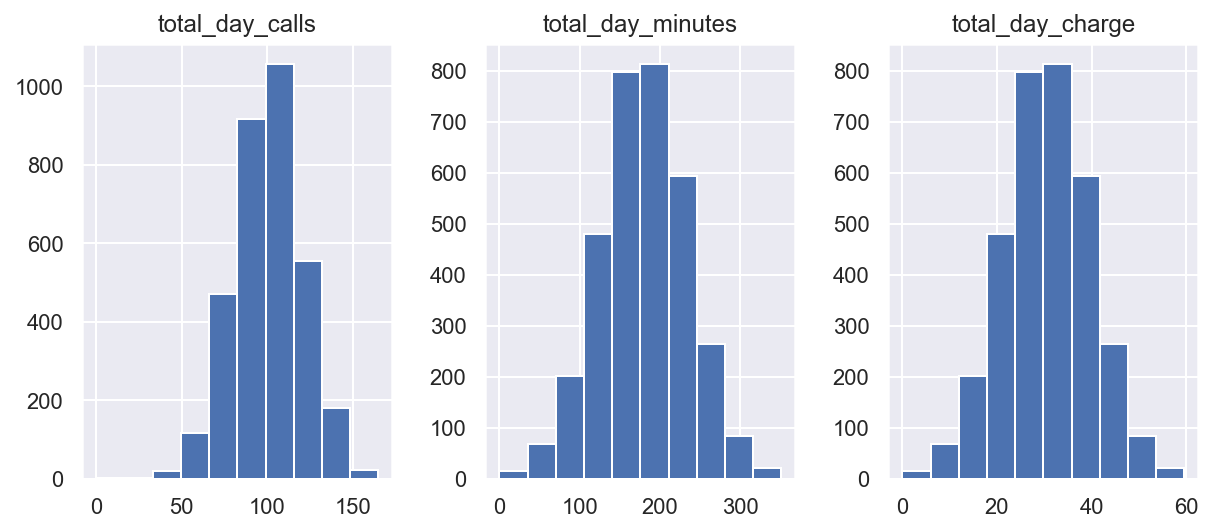

In [184]:
cols1 = ['total_day_calls', 'total_day_minutes', 'total_day_charge']
df[cols1].hist(figsize=(10, 4), layout=(1, 3))

In [185]:
cols2 = ['total_night_calls', 'total_night_minutes', 'total_night_charge']
df[cols2].hist(figsize=(10, 4), layout = (1, 3))

array([[<AxesSubplot:title={'center':'total_night_calls'}>,
        <AxesSubplot:title={'center':'total_night_minutes'}>,
        <AxesSubplot:title={'center':'total_night_charge'}>]],
      dtype=object)

array([[<AxesSubplot:title={'center':'total_intl_calls'}>,
        <AxesSubplot:title={'center':'total_intl_minutes'}>],
       [<AxesSubplot:title={'center':'total_intl_charge'}>,
        <AxesSubplot:>]], dtype=object)

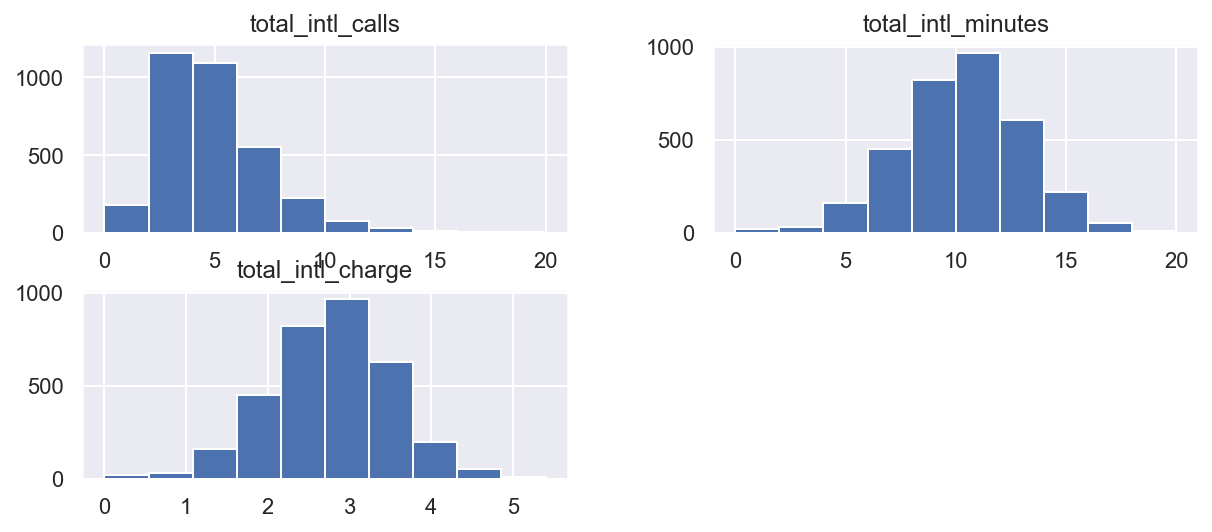

In [186]:
cols2 = ['total_intl_calls', 'total_intl_minutes', 'total_intl_charge']
df[cols2].hist(figsize=(10, 4))

In [187]:
cols3 = ['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']
df[cols3].plot(kind='density', subplots=True, sharex=False, figsize=(10, 4))


array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

Kernel Density Plots can be considered a smoothed version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins.

In [188]:
cols4 = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']
df[cols4].plot(kind='density', subplots=True, sharex=False, figsize=(10, 4))

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

<AxesSubplot:xlabel='total_intl_calls', ylabel='Density'>

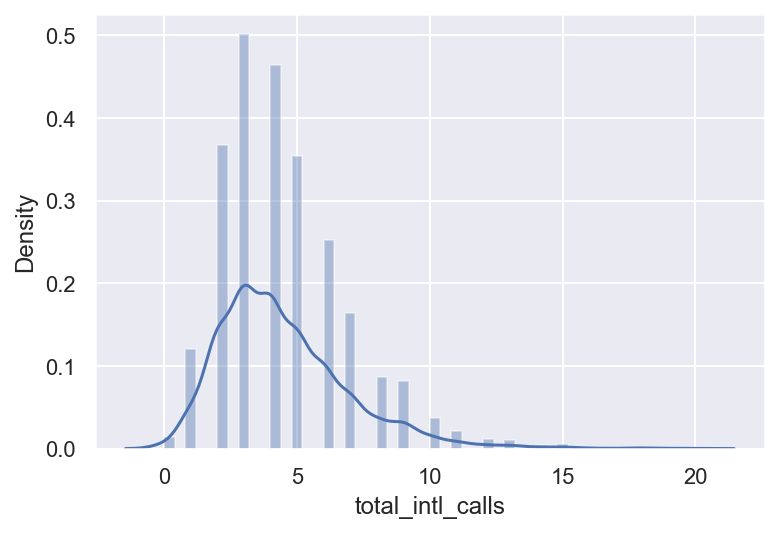

In [189]:
sns.distplot(df['total_intl_calls'])

Distplot displays both the histogram with the kernel density estimate (KDE) on top. The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin.

<AxesSubplot:xlabel='total_intl_calls'>

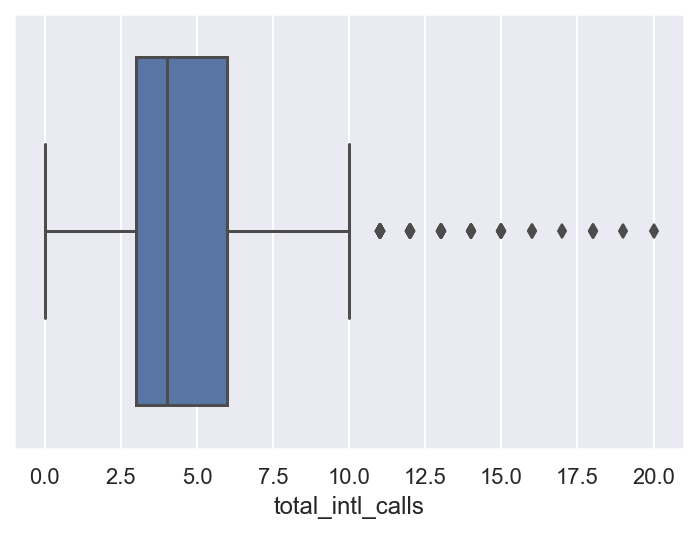

In [190]:
sns.boxplot(x='total_intl_calls', data=df)

<AxesSubplot:>

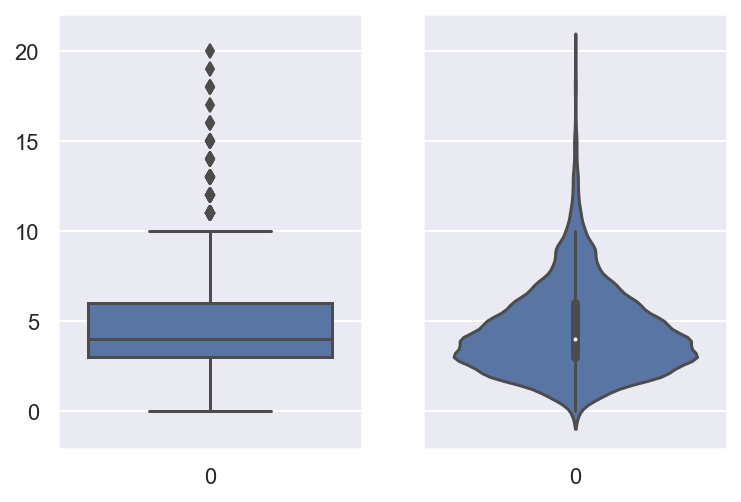

In [191]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['total_intl_calls'], ax=axes[0])
sns.violinplot(data=df['total_intl_calls'], ax=axes[1])

Boxplot illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole. Here, violinplot doesn't add any new information.



<AxesSubplot:xlabel='customer_service_calls', ylabel='count'>

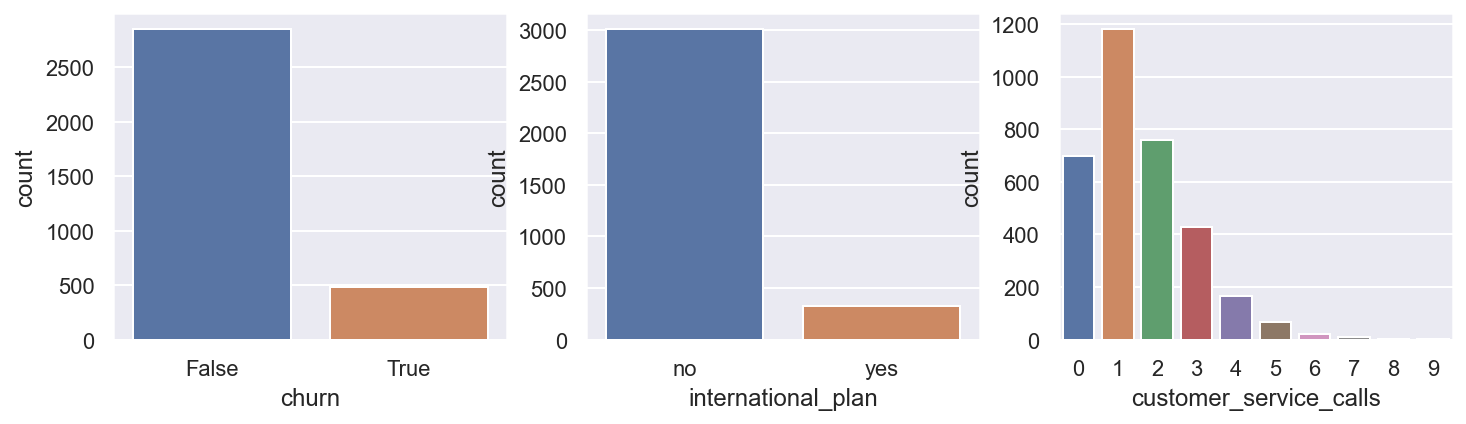

In [192]:
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
sns.countplot(x='churn', data=df, ax=axes[0])
sns.countplot(x='international_plan', data=df, ax=axes[1])
sns.countplot(x='customer_service_calls', data=df, ax=axes[2])

(Plot 3) Majority of customers resolve their problems in maximum 2-3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn.

# Multivariate Plots

In [193]:
cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

<AxesSubplot:>

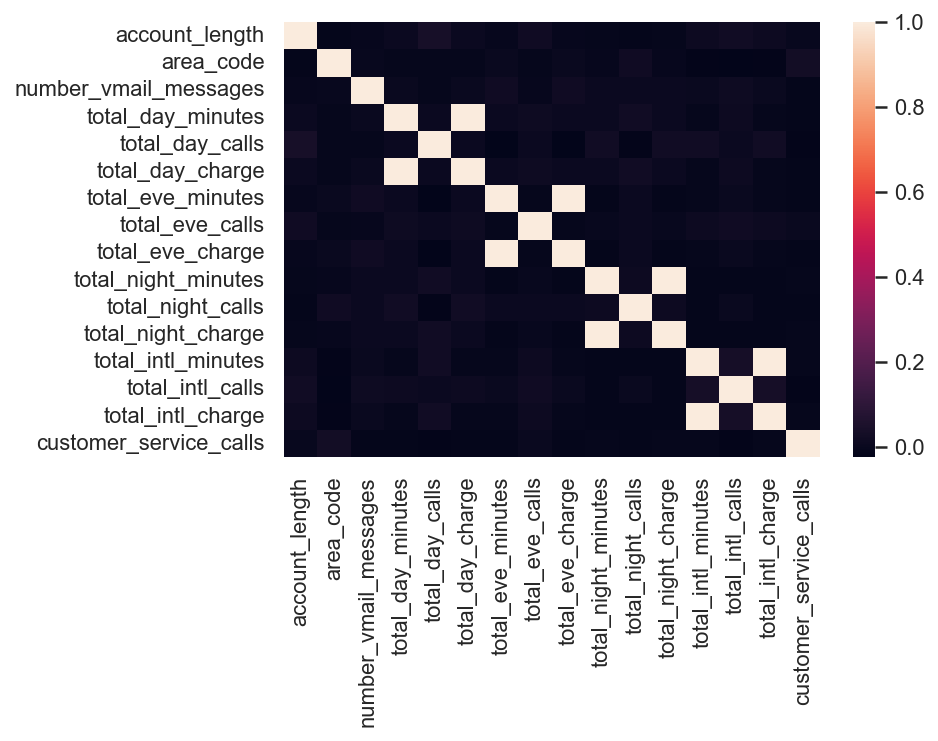

In [194]:
corr_matrix=df[cols].corr()
sns.heatmap(corr_matrix)

Total_day_calls, total_day_minutes and total_day_charge are dependent variables, can be removed.

In [195]:
features_to_use = ['account_length', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge', 'customer_service_calls']

<AxesSubplot:>

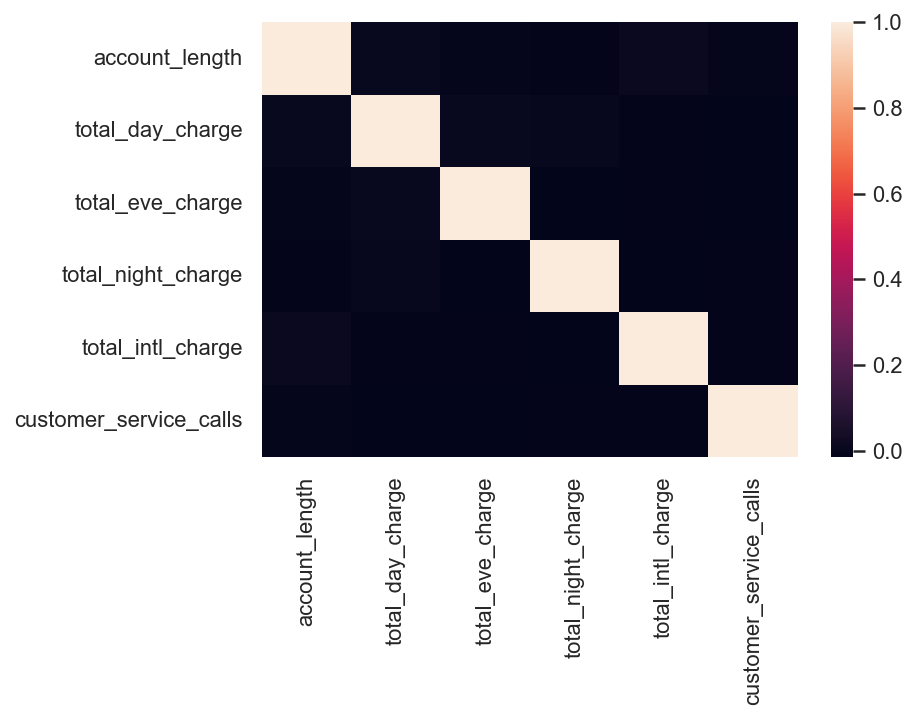

In [196]:
corr_matrix=df[features_to_use].corr()
sns.heatmap(corr_matrix)

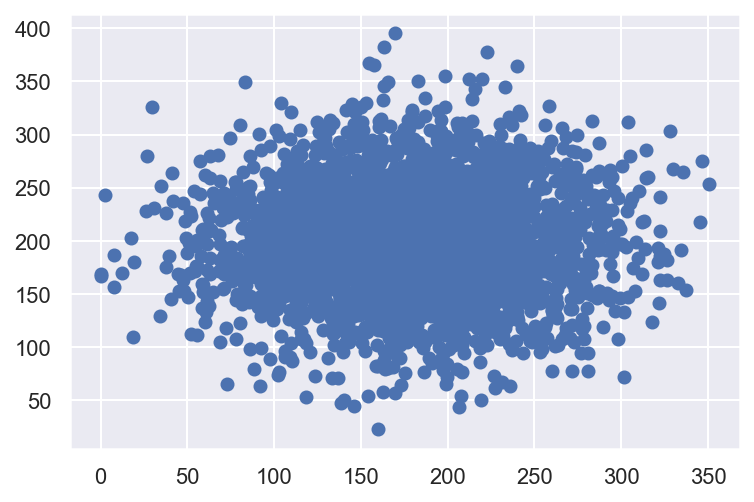

In [197]:
plt.scatter(df['total_day_minutes'], df['total_night_minutes'])

An uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellipse-like shape is aligned with the axes.

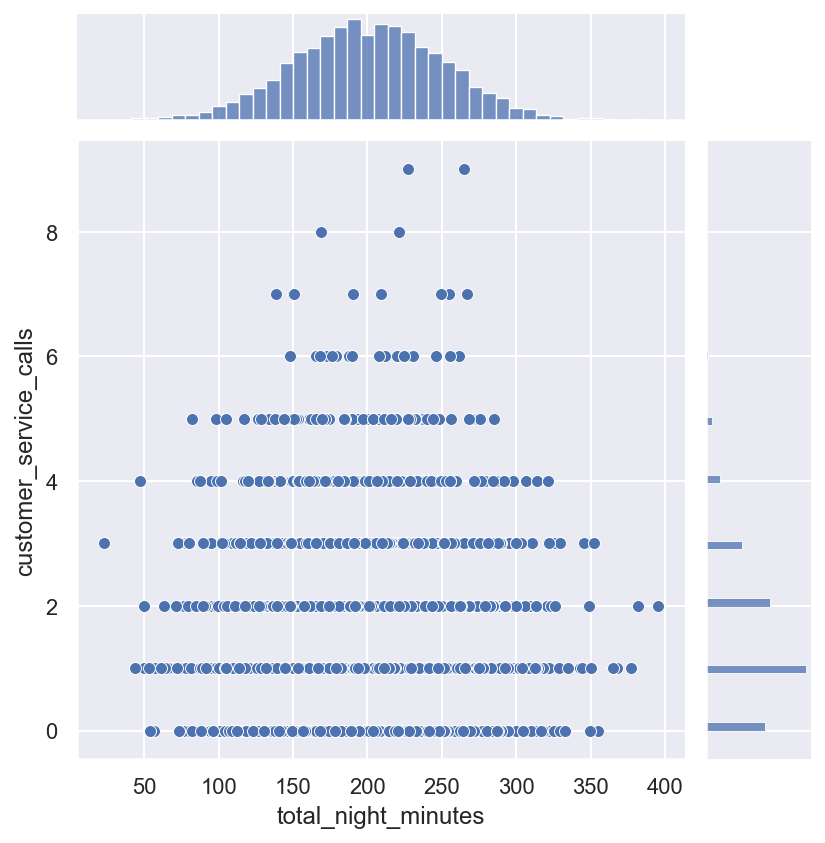

In [198]:
sns.jointplot(x='total_night_minutes', y='customer_service_calls', data=df, kind='scatter')

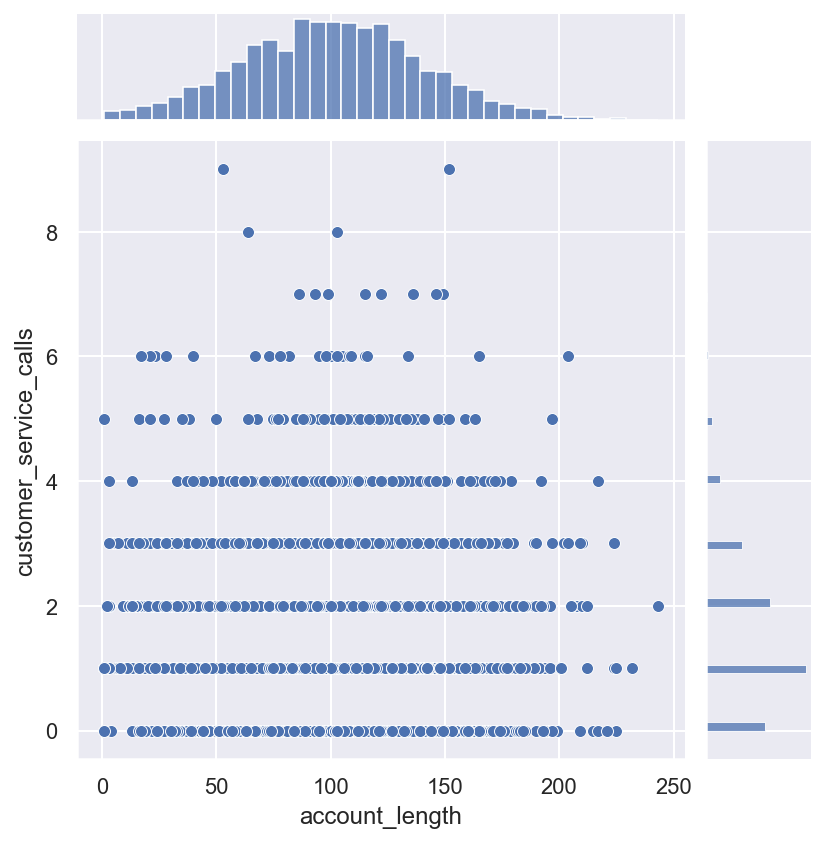

In [199]:
sns.jointplot(x='account_length', y='customer_service_calls', data=df, kind='scatter')

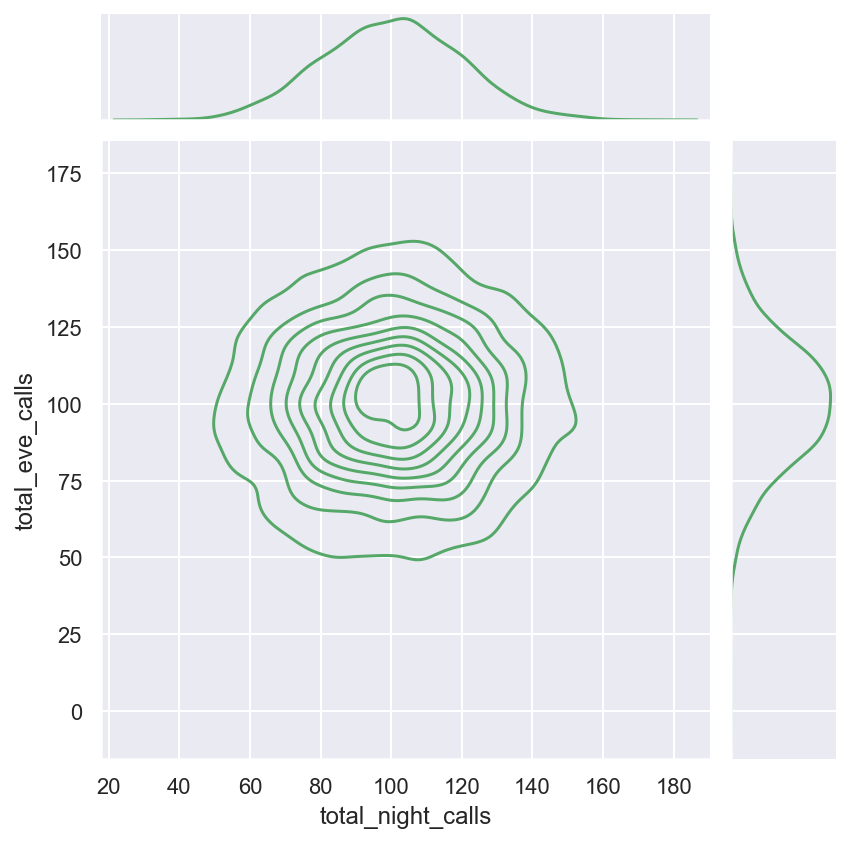

In [200]:
sns.jointplot(x='total_night_calls', y='total_eve_calls', data=df, kind='kde', color='g')

In [201]:
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

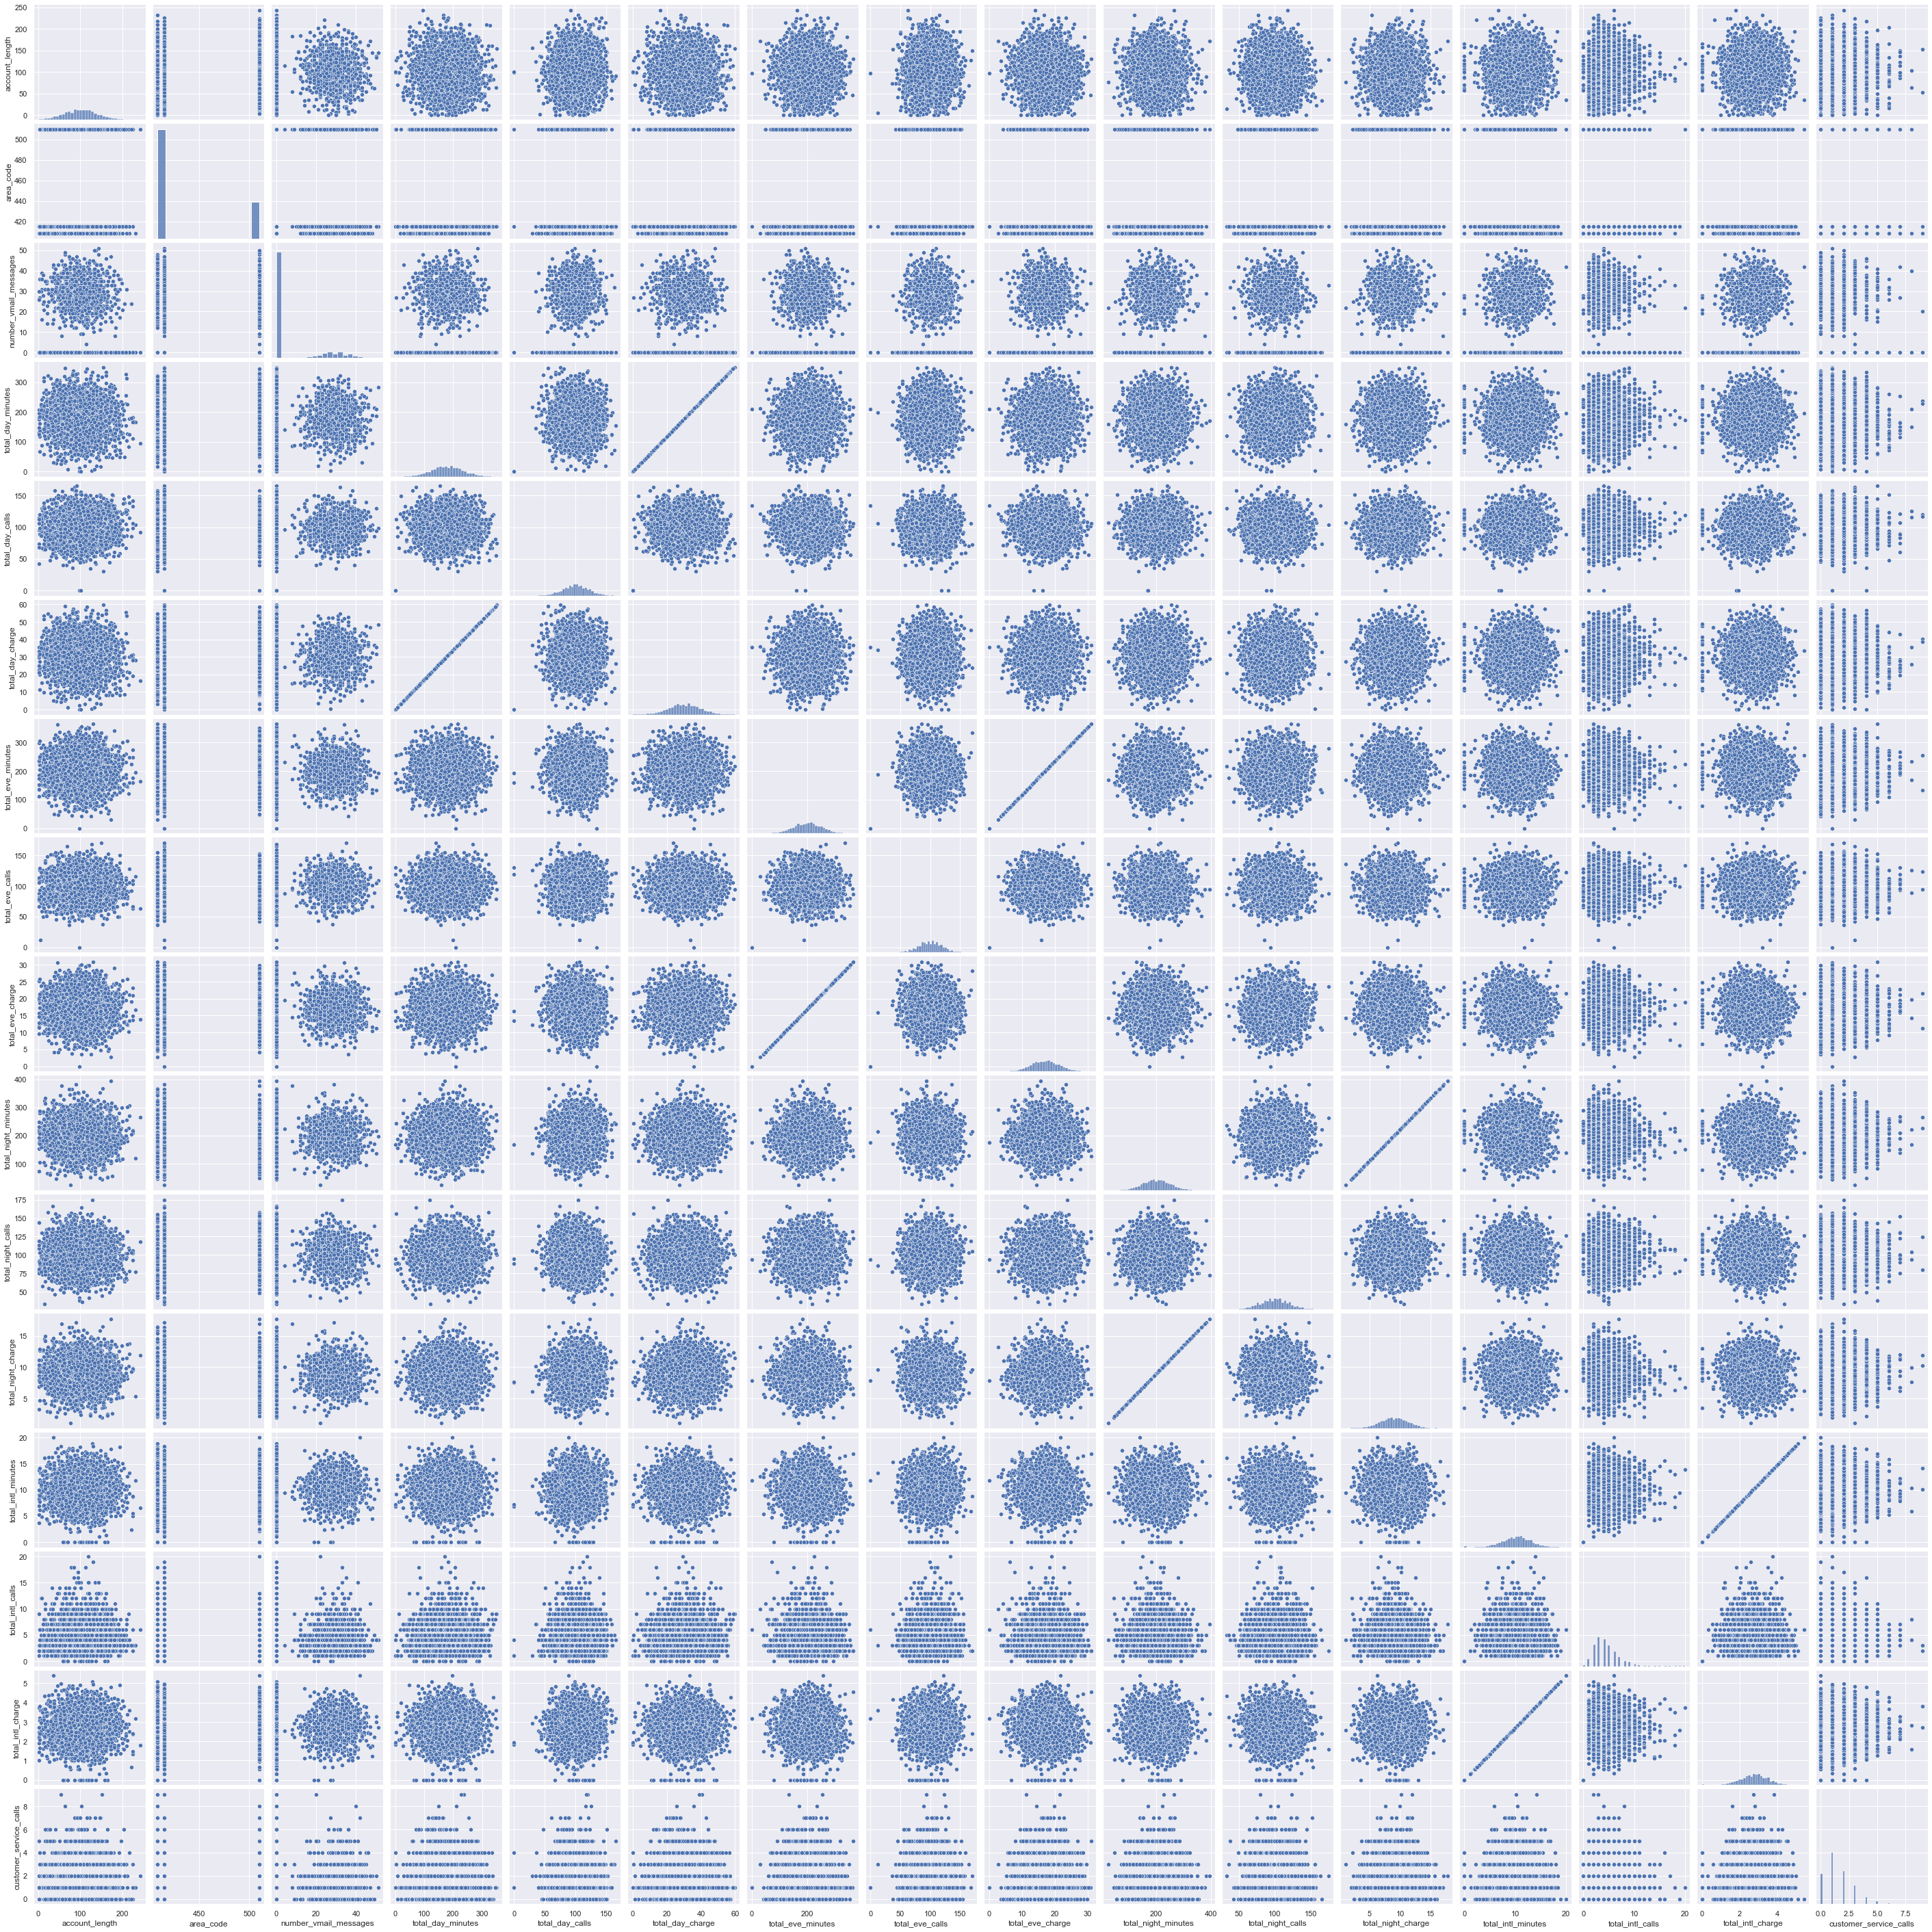

In [202]:
%config InlineBackend.figure_format = 'png'

sns.pairplot(df[num_cols])

In [205]:
%config InlineBackend.figure_format = 'retina'

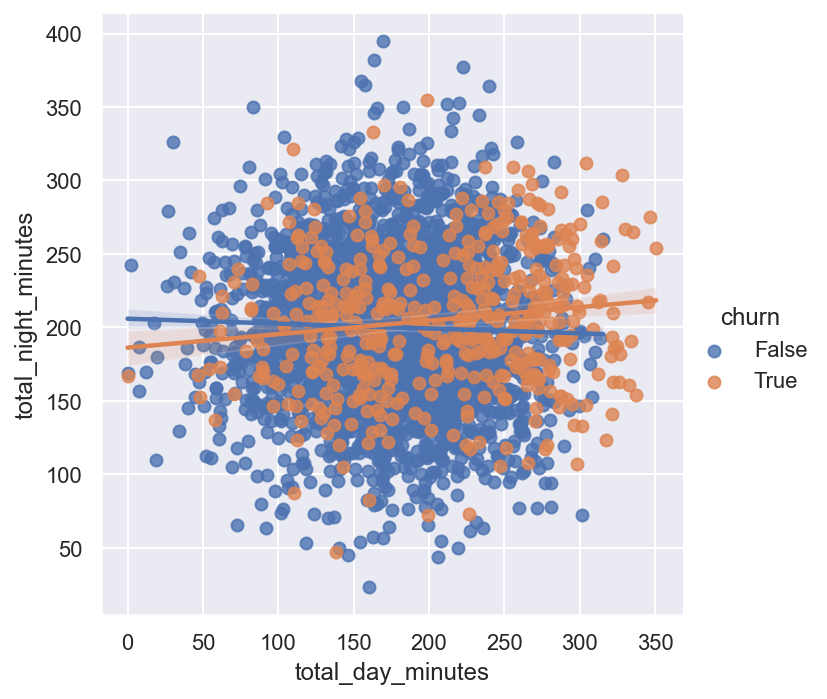

In [206]:
sns.lmplot('total_day_minutes', 'total_night_minutes', data=df, hue='churn', fit_reg=True)

The small proportion of disloyal customers lean towards the top-right corner; that is, such customers tend to spend more time on the phone during both day and night. But this is not absolutely clear, and we won't make any definitive conclusions.

In [207]:
predictors = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes', 'customer_service_calls']

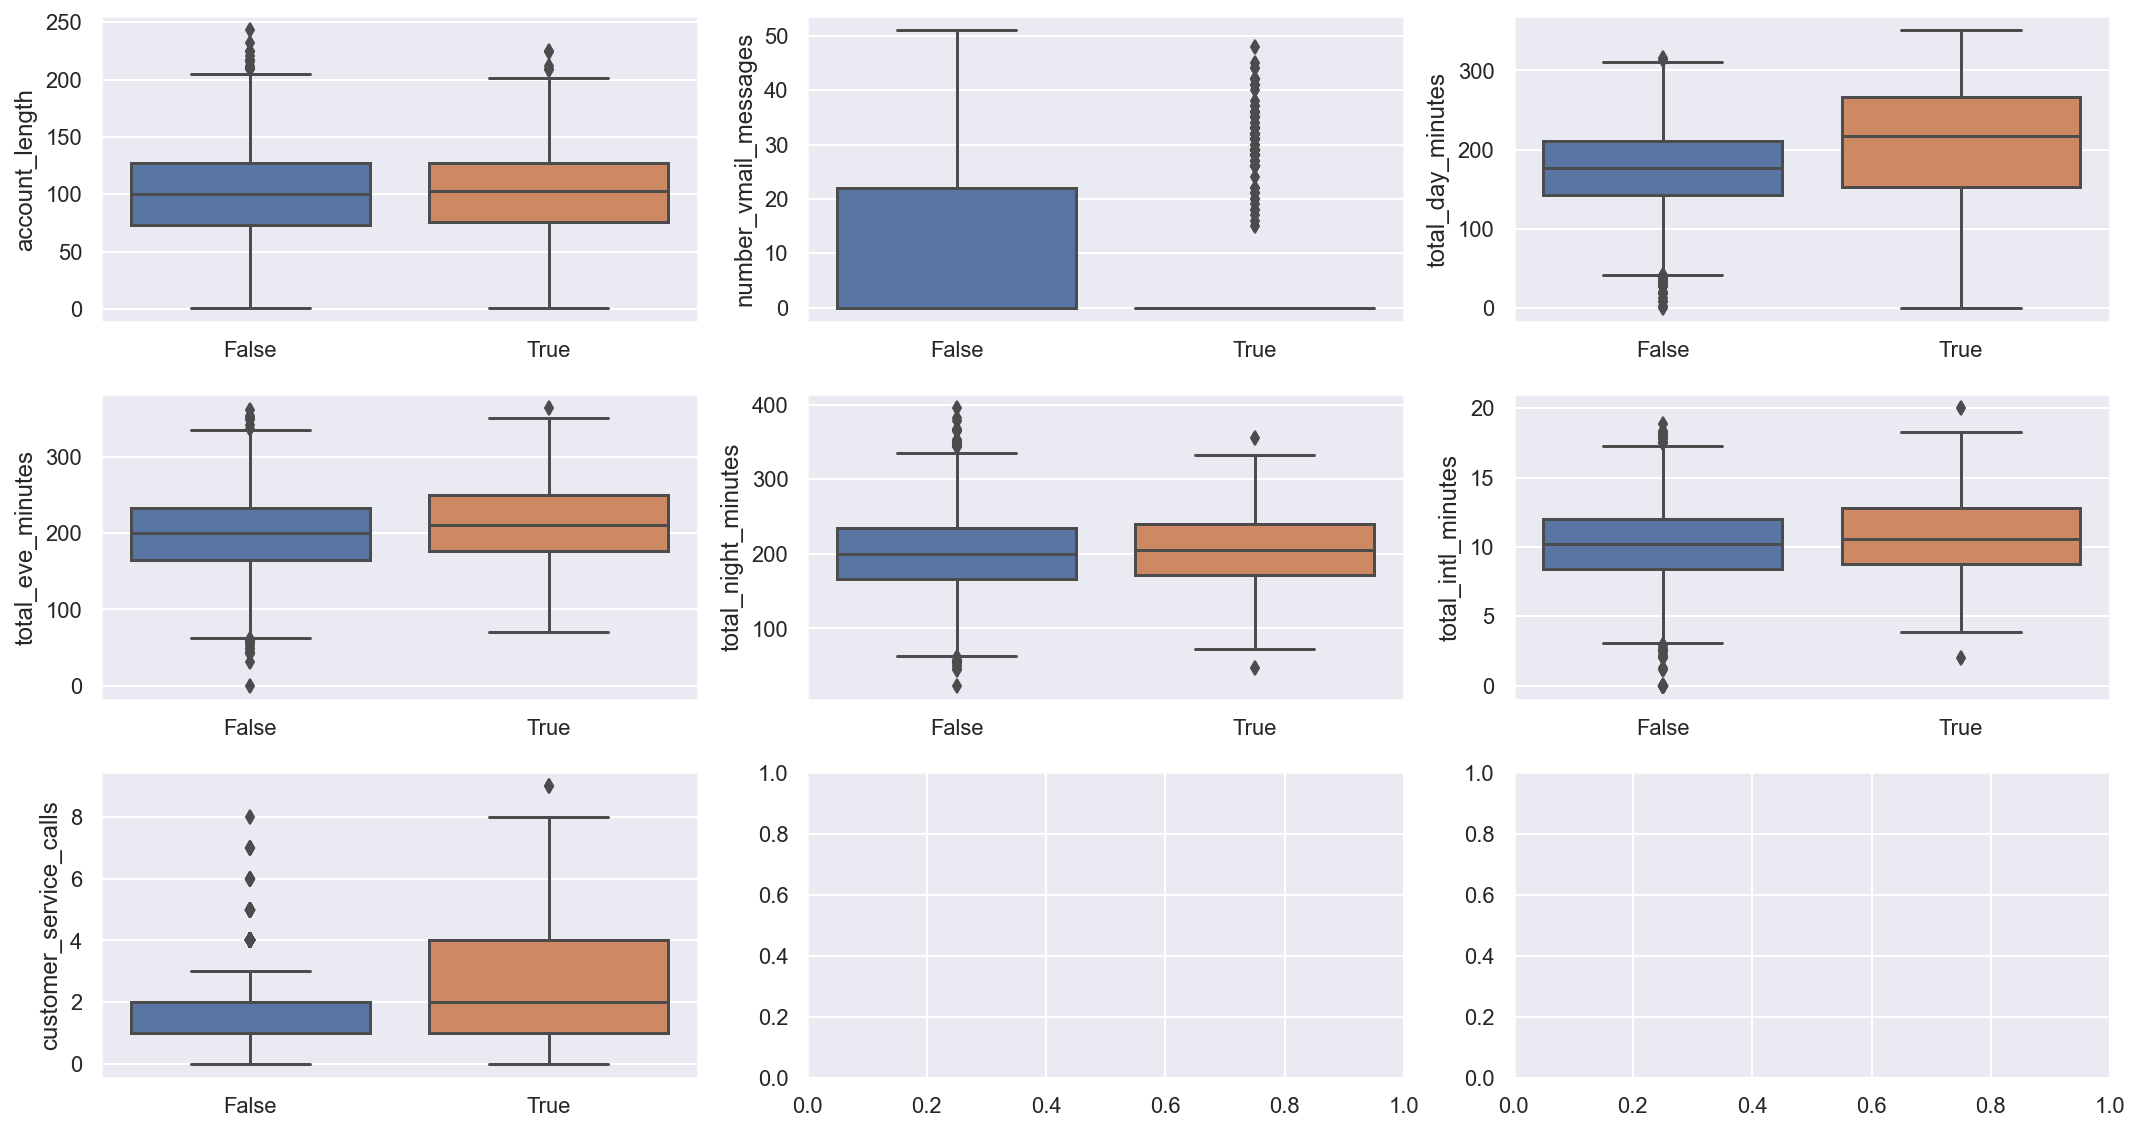

In [208]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

for idx, pred in enumerate(predictors):
    
    ax = axes[int(idx/3), idx%3]
    sns.boxplot(x='churn', y=pred, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(pred)

fig.tight_layout()

Predictors which distinguish 'churn' appear to be: number_vmail_messages, total_day_minutes, customer_service_calls. Later, this links with how to determine feature importance in classification using Random Forest or Gradient Boosting. The last two predictors are found as relatively more important features.

<AxesSubplot:xlabel='churn', ylabel='total_day_minutes'>

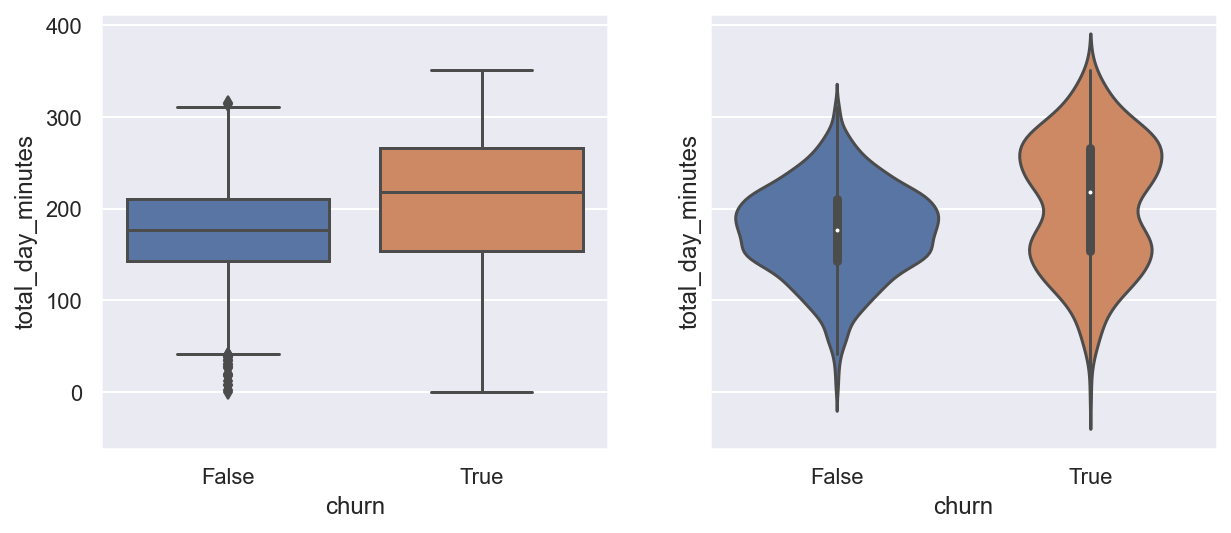

In [209]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='churn', y='total_day_minutes', data=df, ax=axes[0])
sns.violinplot(x='churn', y='total_day_minutes', data=df, ax=axes[1])

<AxesSubplot:xlabel='churn', ylabel='customer_service_calls'>

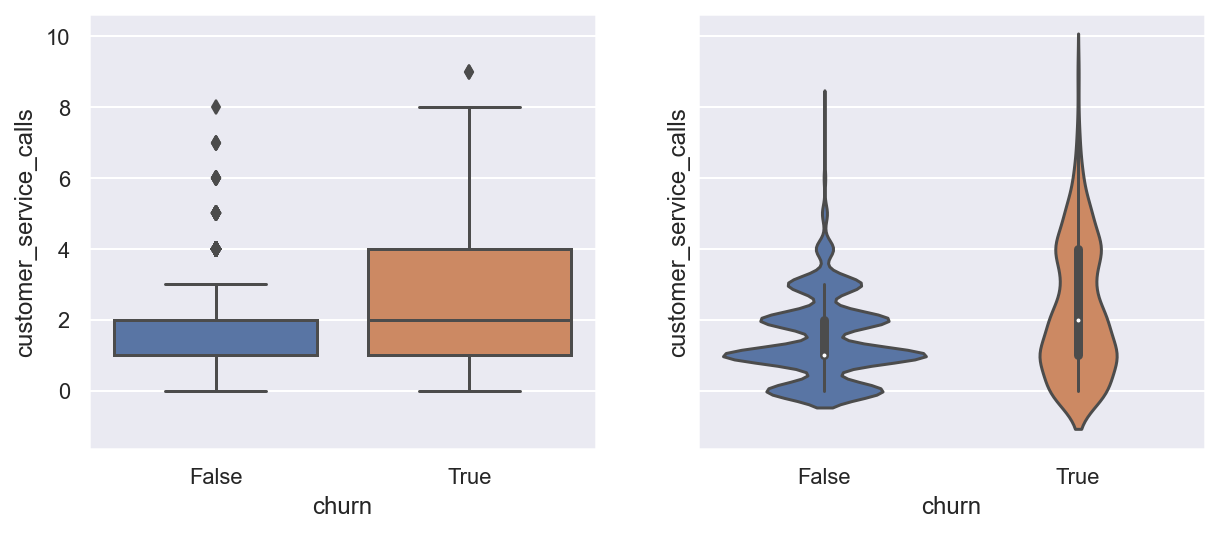

In [210]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='churn', y='customer_service_calls', data=df, ax=axes[0])
sns.violinplot(x='churn', y='customer_service_calls', data=df, ax=axes[1])

On average, customers that discontinue their contracts are more active users of communication services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates. The company will need to undertake additional economic analysis to find out whether such measures would be beneficial.

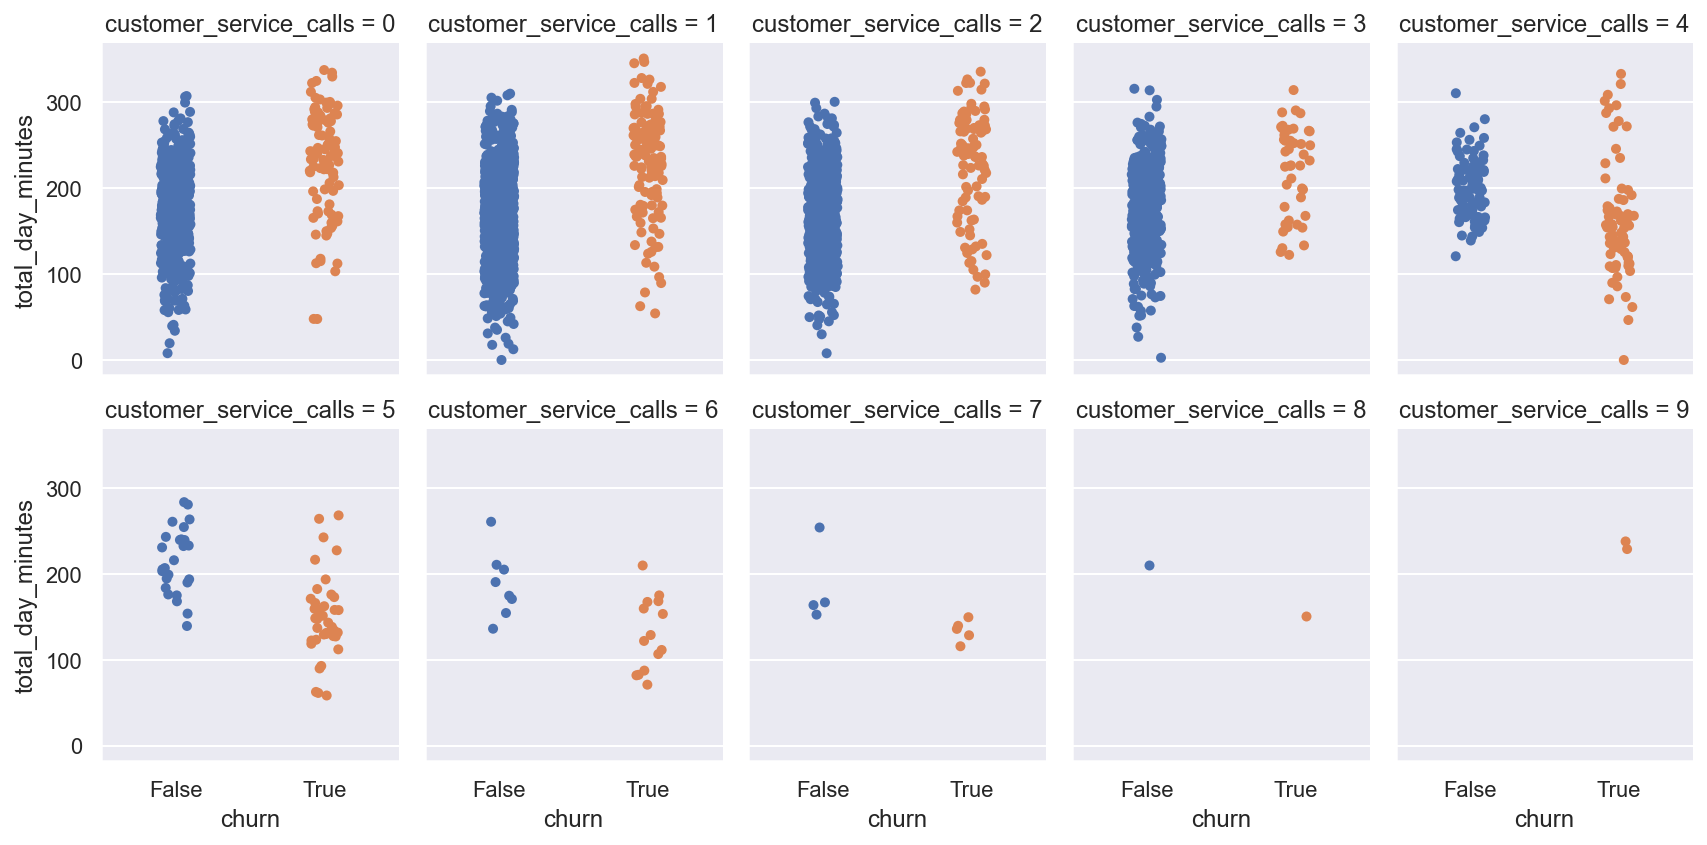

In [211]:
sns.catplot(x='churn', y='total_day_minutes', col='customer_service_calls', data=df, col_wrap=5, height=3, aspect=0.8)

Starting with 4 calls, total_day_minutes may no longer be the main factor for customer churn. Perhaps, in addition to our previous guess about the tariffs, there are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.

<AxesSubplot:xlabel='customer_service_calls', ylabel='count'>

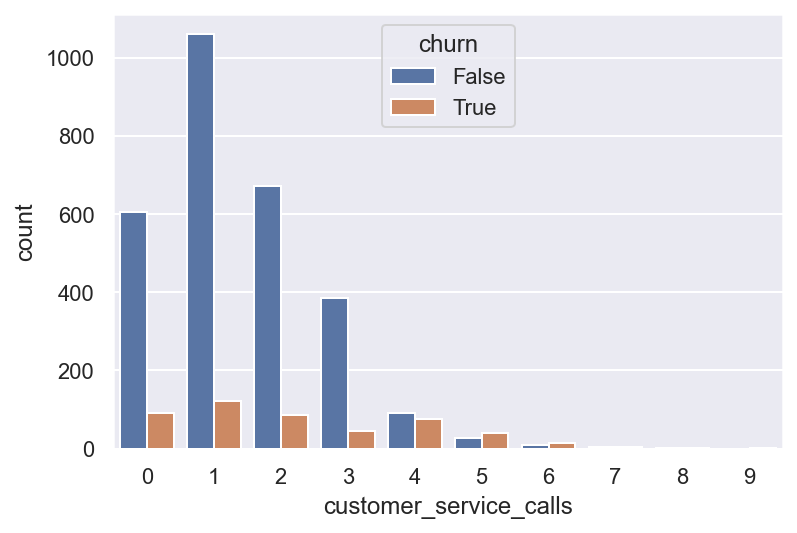

In [212]:
sns.countplot(x='customer_service_calls', hue='churn', data=df)

Churn rate increases significantly after 4 or more calls to customer service.

<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

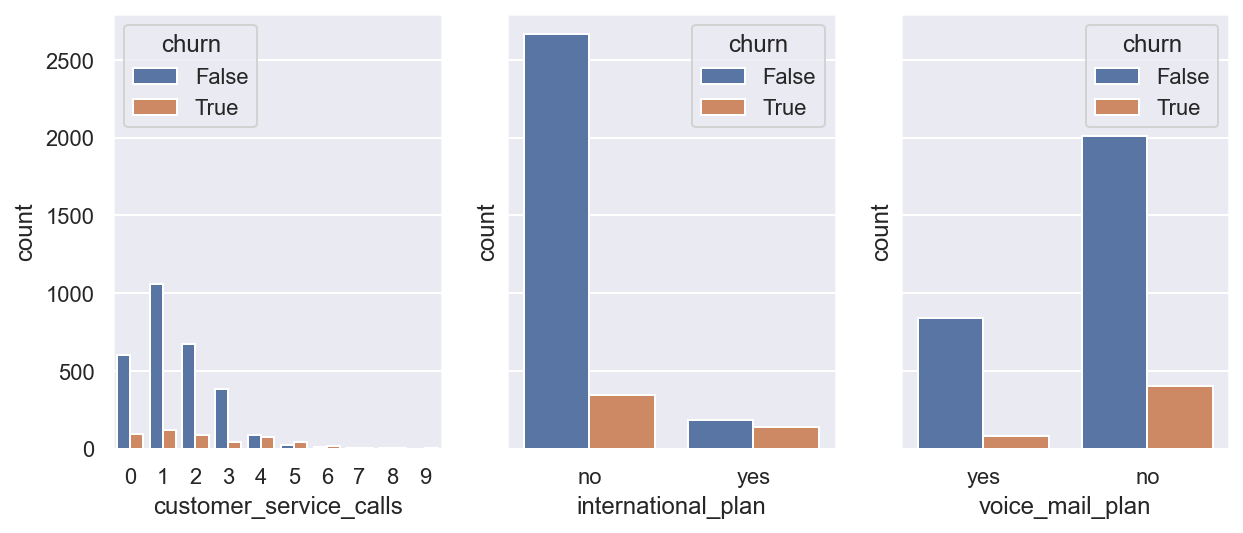

In [214]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(10, 4))

sns.countplot(x='customer_service_calls', hue='churn', data=df, ax=axes[0])
sns.countplot(x='international_plan', hue='churn', data=df, ax=axes[1])
sns.countplot(x='voice_mail_plan', hue='churn', data=df, ax=axes[2])

When international_plan is enabled, the churn rate is much higher, i.e., it is a strong feature. We do not observe the same effect with voice_mail_plan.

In [215]:
pd.crosstab(df['state'], df['churn']).T

state  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

state  WA  WI  WV  WY  
churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

In [216]:
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

state        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

state        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

Listing statewise average churn rates in descending order.

Churn rates in New Jersey and California are greater than 25% and less than 6% in Hawaii and Alaska. However, these conclusions are based on too few examples and could be a mere property of this particular dataset. This can be confirmed with the Matthews and Cramer correlation hypotheses, but this is beyond the current scope.

# Whole Dataset Visualisation : Dimensionality Reduction using t-SNE (t-distributed Stohastic Neighbor Embedding)

In [217]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [218]:
X = df[['international_plan', 'voice_mail_plan', 'total_day_minutes', 'total_intl_minutes', 'customer_service_calls']]

In [219]:
X

international_plan voice_mail_plan  total_day_minutes  \
0                    no             yes              265.1   
1                    no             yes              161.6   
2                    no              no              243.4   
3                   yes              no              299.4   
4                   yes              no              166.7   
...                 ...             ...                ...   
3328                 no             yes              156.2   
3329                 no              no              231.1   
3330                 no              no              180.8   
3331                yes              no              213.8   
3332                 no             yes              234.4   

      total_intl_minutes  customer_service_calls  
0                   10.0                       1  
1                   13.7                       1  
2                   12.2                       0  
3                    6.6                       2  
4                   10.1                       3  
...                  ...                     ...  
3328                 9.9                       2  
3329                 9.6                       3  
3330                14.1                       2  
3331                 5.0                       2  
3332                13.7                       0  

[3333 rows x 5 columns]

In [220]:
X['international_plan'] = X['international_plan'].map({'yes': True, 'no': False})
X['voice_mail_plan'] = X['voice_mail_plan'].map({'yes': True, 'no': False})

In [222]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [223]:
tsne = TSNE(random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

In [ ]:
plt.scatter()